## Step 1: Data Import

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,scoring_average,SG_OTT,SG_APP,SG_ATG,SG_PUTTING,sg_ttg,birdie_avg,driving_dist_yds,gir_pct
0,12716,Charley Hoffman,71.041,0.098,0.035,0.049,-0.252,0.183,4.04,302.4,0.6439
1,22371,Aaron Baddeley,71.367,-0.781,-0.372,0.415,0.610,-0.737,3.69,282.1,0.6215
2,22405,Justin Rose,71.640,-0.130,-0.427,-0.021,0.020,-0.578,3.71,297.8,0.6209
3,23108,Matt Kuchar,71.354,-0.370,-0.562,0.196,0.452,-0.736,2.96,286.3,0.5951
4,23320,Ryan Palmer,71.649,0.153,-0.475,-0.086,-0.304,-0.408,3.56,299.0,0.6358


SG_OTT -> Strokes Gained Off the Tee
SG_APP -> Strokes Gained Approach
SG_ATG -> Stroked Gained Around the Green
SG_PUTTING -> Strokes Gained Putting
SG_TTG -> Strokes Gained Tee To Green

birdie_avg -> average # of birdies per round

driving_dist_yds -> average drive distance (in yards)

gir_pct -> green in regulation percentage

green in regulation is did you hit the green in Par-2 strokes. (1 stroke on a Par 3, 2 strokes on a Par 4, 3 strokes on a Par 5)

In [4]:
df.isnull().sum()

PLAYER_ID           0
PLAYER_NAME         0
scoring_average     0
SG_OTT              0
SG_APP              0
SG_ATG              0
SG_PUTTING          0
sg_ttg              0
birdie_avg          0
driving_dist_yds    0
gir_pct             0
dtype: int64

In [5]:
df.shape

(177, 11)

I am going to Drop strokes gained TTG because it is a holistic measure and seems to be biasing the data which loses the granularity we are looking for. 

In [8]:
df.drop('sg_ttg', inplace=True, axis=1)

In [9]:
df.shape

(177, 10)

In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

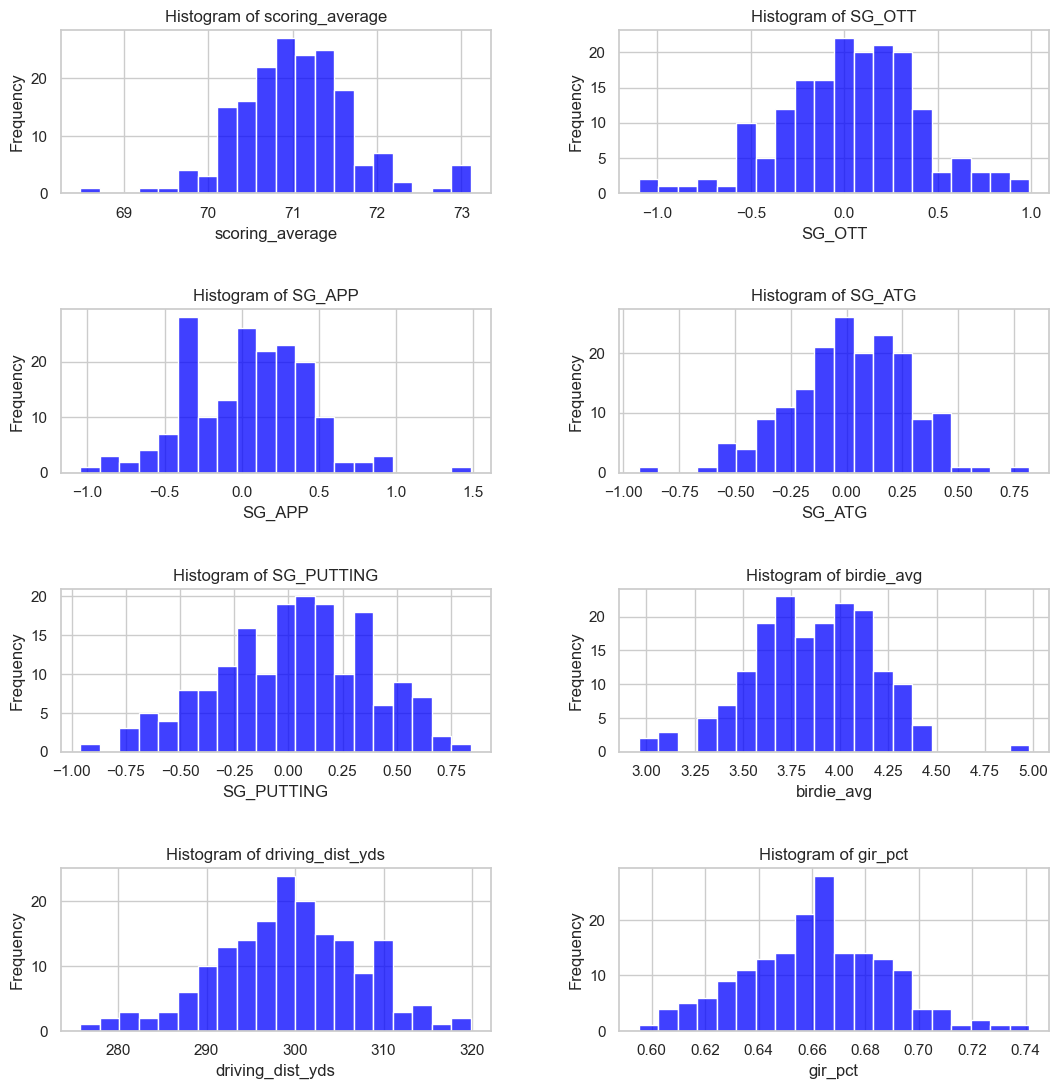

In [11]:
# Create some histograms to show the different ranges

import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style='whitegrid')

# Set up the figure and axes for a 3x2 grid of plots
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)

# List of columns to plot
columns = ['scoring_average', 'SG_OTT', 'SG_APP', 'SG_ATG', 'SG_PUTTING', 'birdie_avg', 'driving_dist_yds','gir_pct']

# Plot histograms with Seaborn
for ax, column in zip(axes.flatten(), columns):
    sns.histplot(df[column], bins=20, kde=False, color='blue', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplot (if any)
if len(columns) < 6:
    fig.delaxes(axes.flatten()[len(columns)])

plt.show()

## Step 2: Outlier Detection & Removal

For this data, since the data mostly follows a normal distribution, I am going to remove outliers that are more than 3 st deviations away from the median. 

In [12]:
df.scoring_average.mean()

np.float64(71.04106214689266)

In [10]:
df.scoring_average.std()

np.float64(0.6952762707778314)

In [13]:
# Function to remove outliers (3 st deviations away from the mean)

def remove_outliers(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    df_filtered = df[(df[column] <= upper_bound) & (df[column] >= lower_bound)]
    return df_filtered

In [14]:
columns_to_check = [
    'scoring_average',
    'SG_OTT',
    'SG_APP',
    'SG_ATG',
    'SG_PUTTING',
    'birdie_avg',
    'driving_dist_yds',
    'gir_pct'
]

In [15]:
# Apply the function to each column

for column in columns_to_check:
    df = remove_outliers(df, column)

In [16]:
df.shape

(173, 10)

Looks like we removed 4 outliers!

In [17]:
X = df.drop(['PLAYER_ID', 'PLAYER_NAME', 'scoring_average'], axis=1)
X.head()

,SG_OTT,SG_APP,SG_ATG,SG_PUTTING,birdie_avg,driving_dist_yds,gir_pct
0,0.098,0.035,0.049,-0.252,4.04,302.4,0.6439
1,-0.781,-0.372,0.415,0.610,3.69,282.1,0.6215
2,-0.130,-0.427,-0.021,0.020,3.71,297.8,0.6209
3,-0.370,-0.562,0.196,0.452,2.96,286.3,0.5951
4,0.153,-0.475,-0.086,-0.304,3.56,299.0,0.6358


In [18]:
X.shape

(173, 7)

In [19]:
y = df['scoring_average']
y.head()

0    71.041
1    71.367
2    71.640
3    71.354
4    71.649
Name: scoring_average, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.76700852e-01, -9.82343174e-03,  1.60925767e-01, ...,
         6.09116359e-01,  3.87724523e-01, -6.62862082e-01],
       [-2.27385715e+00, -1.12723482e+00,  1.65061842e+00, ...,
        -5.49601691e-01, -2.11025704e+00, -1.52531277e+00],
       [-4.58938766e-01, -1.27823636e+00, -1.23988128e-01, ...,
        -4.83389231e-01, -1.78320561e-01, -1.54841413e+00],
       ...,
       [-8.13001185e-01,  2.58678413e-02, -7.87430484e-01, ...,
         1.20502850e+00,  7.19968377e-01, -1.29429920e+00],
       [-1.31203404e+00,  3.69053158e-01,  4.86541648e-01, ...,
         1.00639112e+00, -2.27541873e-01, -6.60770052e-02],
       [-4.08756691e-01, -5.61665422e-01,  4.66190655e-01, ...,
         2.44947829e-01,  4.73861819e-01, -6.23158014e-04]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [22]:
# Build V3 of the model

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8395022007127959

Now, let's test the model!

In [25]:
def predict_scoring_avg(sg_ott, sg_app, sg_atg, sg_putting, birdie_avg, driving_dist_yds, gir_pct):    
    
    x = np.zeros(len(X.columns))
    x[0] = sg_ott
    x[1] = sg_app
    x[2] = sg_atg
    x[3] = sg_putting
    x[4] = birdie_avg
    x[5] = driving_dist_yds
    x[6] = gir_pct

     # Apply the standard scaler
    x_scaled = scaler.transform([x])

    return model1.predict(x_scaled)[0]

In [27]:
# Define the inputs
sg_ott = 0.1
sg_app = 0.2
sg_atg = 0.3
sg_putting = 0.4
birdie_avg = 3.5
driving_dist_yds = 300
gir_pct = 0.65

# Predict the scoring average
prediction = predict_scoring_avg(sg_ott, sg_app, sg_atg, sg_putting, birdie_avg, driving_dist_yds, gir_pct)
print(f"Predicted Scoring Average: {prediction}")

Predicted Scoring Average: 70.28086154246192


/Users/rohansaxena/Desktop/PGA-tour-statistics-v2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
columns = ["sg_ott", "sg_app", "sg_atg", "sg_putting", "birdie_avg", "driving_dist_yds", "gir_pct"]

# Define the inputs
sg_ott = -0.5
sg_app = -0.2
sg_atg = 0.3
sg_putting = -1
birdie_avg = 1
driving_dist_yds = 280
gir_pct = 0.60

# Predict the scoring average
prediction = predict_scoring_avg(sg_ott, sg_app, sg_atg, sg_putting, birdie_avg, driving_dist_yds, gir_pct)
print(f"Predicted Scoring Average: {prediction}")

Predicted Scoring Average: 72.60092066196714


/Users/rohansaxena/Desktop/PGA-tour-statistics-v2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pickle
with open('scoring_avg_model_v3.pickle','wb') as f:
    pickle.dump(model1,f)

In [31]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [32]:
with open('scaler_v2.pickle', 'wb') as f:
    pickle.dump(scaler, f)